<a href="https://colab.research.google.com/github/Deepak-Mewada/Advance-Machine-Learning/blob/main/TF2C1W1_Functional_API_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF2C1 : Custom Models, Layers, and Loss Functions with TensorFlow

## W1 Functional API Practice

In [ ]:
# importing tensorflow
import tensorflow as tf

In [ ]:
#importing necessary functions

from tensorflow.keras.layers import Input

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])



### Step1 : Input

In [ ]:
#defining input (1st deviation from the sequential API)
input = Input(shape= (28,28))

### Step *2* : Layers

In [ ]:
#import the necessary function fro defining the layers
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
# defing the layers

x = Flatten()(input)
x = Dense(128,activation="relu")(x)
predictions = Dense(10, activation= "softmax")(x)




### Step3: Defining the model

In [ ]:
#importing the modle function

from tensorflow.keras.models import Model

In [ ]:
#@title Default title text
#calling the model

func_model= Model(inputs = input, outputs = predictions)



In [ ]:
#@title Plot model graph

#importting necessary function

from tensorflow.keras.utils import plot_model



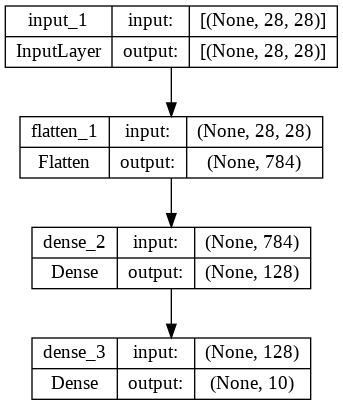

In [ ]:
plot_model(func_model, show_shapes=True, to_file='model.png')

## Making Individual Functions

In [ ]:
#@title Sequential API

def build_model_with_sequential():

  #instantiate a Sequential class and linearly stack the layers of the model
  seq_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (28,28)),
      tf.keras.layers.Dense(128,activation= 'relu'),
      tf.keras.layers.Dense(10,activation = 'softmax')
  ])

  return seq_model

In [ ]:
#@title Functional API

def build_model_with_functional_API():

  #instantiate the input tensor
  input = Input(shape = (28,28))

  #Stack the layers using the syantax : new_layer()(previous_layer)
  flatten     = tf.keras.layers.Flatten()(input)
  dense_layer = tf.keras.layers.Dense(128, activation = 'relu')(flatten)
  predictions = tf.keras.layers.Dense(10, activation = 'softmax')(dense_layer)

  # declare the inpouts and outputs
  func_model = Model(inputs= input , outputs = predictions)

  return func_model


In [ ]:
#@title Build the model and visualize the modle graph

seq_model = build_model_with_sequential()
func_model = build_model_with_functional_API()

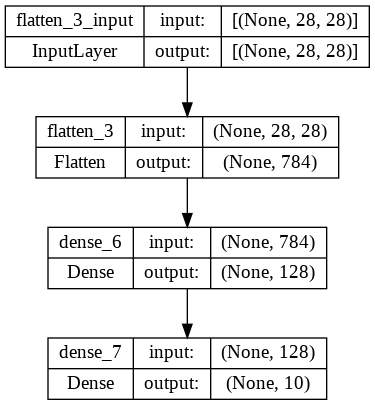

In [ ]:
plot_model(seq_model,show_shapes= True) 

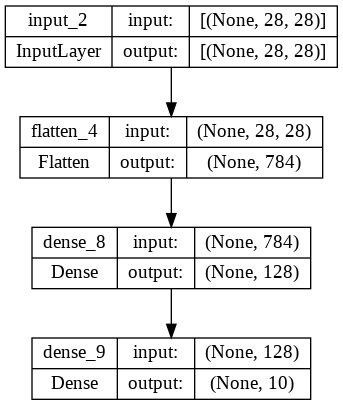

In [ ]:
plot_model(func_model,show_shapes = True)

In [ ]:
#@title Training the model

mnist = tf.keras.datasets.fashion_mnist
(training_image,training_label), (test_image,test_label) = mnist.load_data()
training_image = training_image/255.0
test_image  = test_image/255.0

mpodel= seq_model #func_model

#configure train and evaluate the model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
              )

model.fit(training_image,  training_label, epochs =5)
model.evaluate(test_image,test_label)




Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5004 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3747 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3134 - accuracy: 0.8845
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8688


[0.3645671010017395, 0.8687999844551086]

In [ ]:
training_label.shape

(60000,)

thanks!